# Bayesian Statistics

Based on [https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_TFP.ipynb]

## Coin Flip example
How do we determin the probability of a coin flip?
We have a belief there is a certain probability $p$, but we have no prior opinion what that could be.
We flip a coin and record the observed data.
How do our posterior probabilities change when going from little experiments to a lot of runs.

In [1]:
%pylab inline
import tensorflow as tf
import tensorflow_probability as tfp

Populating the interactive namespace from numpy and matplotlib


### Bernoulli Distribution
![Karsten Adam, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons](https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Bernoulli_Distribution_de.svg/640px-Bernoulli_Distribution_de.svg.png "Bernoulli Distribution")
[https://en.wikipedia.org/wiki/Bernoulli_distribution]


In [2]:
rv_coin_flip_prior = tfp.distributions.Bernoulli(probs=0.5, dtype=tf.int32)

In [3]:
rv_coin_flip_prior.mean().numpy()

0.5

In [4]:
#ntrials = 2000
ntrials = tf.constant([0,1, 2, 3, 4, 5, 8, 15, 50, 500, 1000, 2000])

In [10]:
coin_flip_data = rv_coin_flip_prior.sample(ntrials[-1])

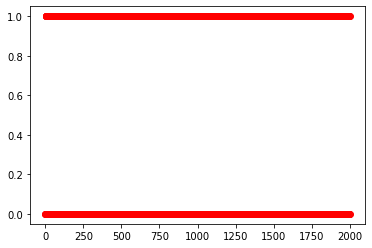

In [12]:
plot(coin_flip_data, 'ro')

In [14]:
# prepend a 0 onto tally of heads and tails, for zeroth flip
coin_flip_data = tf.pad(coin_flip_data,tf.constant([[1, 0,]]),"CONSTANT")

In [15]:
# compute cumulative headcounts from 0 to 2000 flips, and then grab them at each of num_trials intervals
cumulative_headcounts = tf.gather(tf.cumsum(coin_flip_data), ntrials)

In [16]:
# number of head counts
cumulative_headcounts.numpy()

array([  0,   0,   0,   0,   1,   2,   5,  10,  29, 242, 496, 987],
      dtype=int32)

## Prior probability distribution

[The beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) is the conjugate prior probability distribution of the Bernoulli distribution.

In [58]:
# eg uniform distribution p,q = 1
uni = tfp.distributions.Beta(concentration0=1,concentration1=1).prob(tf.linspace(0.,1.,100))

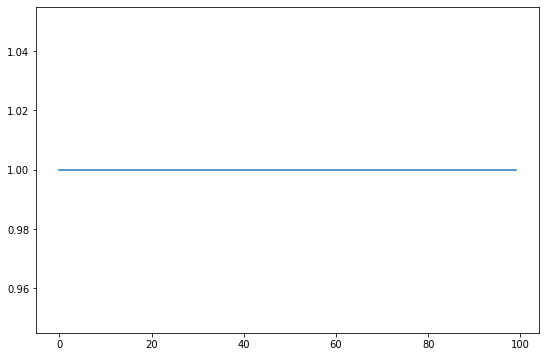

In [59]:
plt.figure(figsize(9, 6))
plot(uni)

In [47]:
# now for observed heads
rv_observed_heads = tfp.distributions.Beta(
    concentration1=tf.cast(1 + cumulative_headcounts, tf.float32),  # number of heads
    concentration0=tf.cast(1 + ntrials - cumulative_headcounts, tf.float32))  # number of tails

In [48]:
rv_observed_heads.mean().numpy()

array([0.5       , 0.33333334, 0.25      , 0.2       , 0.33333334,
       0.42857143, 0.6       , 0.64705884, 0.5769231 , 0.48406374,
       0.49600798, 0.4935065 ], dtype=float32)

In [60]:
probs_of_heads = tf.linspace(start=0., stop=1., num=100, name="linspace")
#observed_probs_heads = tf.transpose(rv_observed_heads.prob(probs_of_heads[:, tf.newaxis]))

InvalidArgumentError: Incompatible shapes: [12] vs. [100] [Op:Xlogy]

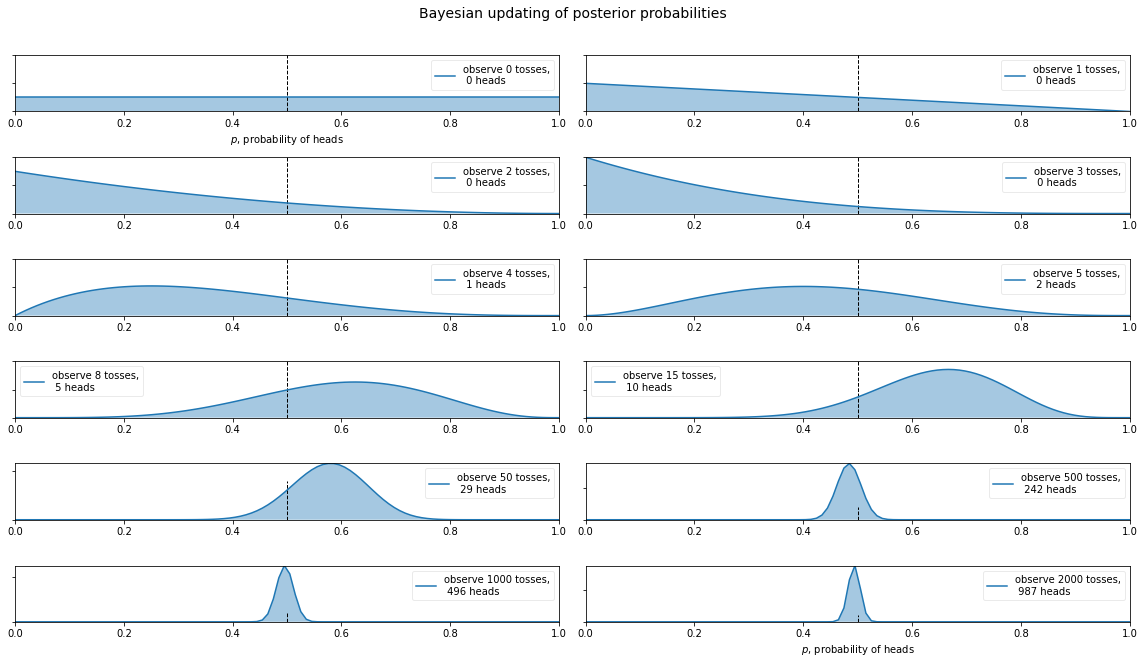

In [50]:
# For the already prepared, I'm using Binomial's conj. prior.
plt.figure(figsize(16, 9))
for i in range(len(ntrials)):
    sx = plt.subplot(int(len(ntrials)/2), 2, i+1)
    plt.xlabel("$p$, probability of heads") \
    if i in [0, len(ntrials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    plt.plot(probs_of_heads, observed_probs_heads[i], 
             label="observe %d tosses,\n %d heads" % (ntrials[i], cumulative_headcounts[i]))
    plt.fill_between(probs_of_heads, 0, observed_probs_heads[i], 
                      alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities", y=1.02,
             fontsize=14)
plt.tight_layout()